In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.DataFrame([[2, True, 3.5, 'hello'], [4, False, 5.12, 'again']])

print(df, '\n')
print(df.dtypes)

   0      1     2      3
0  2   True  3.50  hello
1  4  False  5.12  again 

0      int64
1       bool
2    float64
3     object
dtype: object


### rolling 

In [6]:
df = pd.DataFrame(
    data= np.array([1,2,3,4,5,6,7,8,9,10,11,12]),
    index= pd.date_range('20230410', periods=12),
    columns=['value']
)

In [7]:
df

,value
2023-04-10,1
2023-04-11,2
2023-04-12,3
2023-04-13,4
2023-04-14,5
2023-04-15,6
2023-04-16,7
2023-04-17,8
2023-04-18,9
2023-04-19,10


In [8]:
df['shifted_value'] = df['value'].shift(1)
df

,value,shifted_value
2023-04-10,1,NaN
2023-04-11,2,1.0
2023-04-12,3,2.0
2023-04-13,4,3.0
2023-04-14,5,4.0
2023-04-15,6,5.0
2023-04-16,7,6.0
2023-04-17,8,7.0
2023-04-18,9,8.0
2023-04-19,10,9.0


In [9]:
df['avg'] = df[['value', 'shifted_value']].mean(axis=1)

In [12]:
df['avg_rolling'] = df['value'].rolling(2).mean()
df

,value,shifted_value,avg,avg_rolling
2023-04-10,1,NaN,1.0,NaN
2023-04-11,2,1.0,1.5,1.5
2023-04-12,3,2.0,2.5,2.5
2023-04-13,4,3.0,3.5,3.5
2023-04-14,5,4.0,4.5,4.5
2023-04-15,6,5.0,5.5,5.5
2023-04-16,7,6.0,6.5,6.5
2023-04-17,8,7.0,7.5,7.5
2023-04-18,9,8.0,8.5,8.5
2023-04-19,10,9.0,9.5,9.5


In [14]:
df

,value,shifted_value,avg
2023-04-10,1,NaN,1.0
2023-04-11,2,1.0,1.5
2023-04-12,3,2.0,2.5
2023-04-13,4,3.0,3.5
2023-04-14,5,4.0,4.5
2023-04-15,6,5.0,5.5
2023-04-16,7,6.0,6.5
2023-04-17,8,7.0,7.5
2023-04-18,9,8.0,8.5
2023-04-19,10,9.0,9.5


### slope @specifiedColumn

In [1]:
list = [('2018-10-29', 6.1925), ('2018-10-29', 6.195), ('2018-10-29', 1.95833333333333),
        ('2018-10-29', 1.785), ('2018-10-29',
                                3.05), ('2018-10-29', 1.30666666666667),
        ('2018-10-29', 1.6325), ('2018-10-30', 1.765), ('2018-10-30', 1.265),
        ('2018-10-30', 2.1125), ('2018-10-30',
                                 2.16714285714286), ('2018-10-30', 1.485),
        ('2018-10-30', 1.72), ('2018-10-30',
                               2.754), ('2018-10-30', 1.79666666666667),
        ('2018-10-30', 1.27833333333333), ('2018-10-30', 3.48), ('2018-10-30', 6.19),
        ('2018-10-30', 6.235), ('2018-10-30',
                                6.11857142857143), ('2018-10-30', 6.088),
        ('2018-10-30', 4.3), ('2018-10-30', 7.80666666666667),
        ('2018-10-30', 7.78333333333333), ('2018-10-30', 10.9766666666667),
        ('2018-10-30', 2.19), ('2018-10-30', 1.88)]


In [4]:
df = pd.DataFrame(list, columns=['date', 'value'])

In [4]:
df.head

<bound method NDFrame.head of           date      value
0   2018-10-29   6.192500
1   2018-10-29   6.195000
2   2018-10-29   1.958333
3   2018-10-29   1.785000
4   2018-10-29   3.050000
5   2018-10-29   1.306667
6   2018-10-29   1.632500
7   2018-10-30   1.765000
8   2018-10-30   1.265000
9   2018-10-30   2.112500
10  2018-10-30   2.167143
11  2018-10-30   1.485000
12  2018-10-30   1.720000
13  2018-10-30   2.754000
14  2018-10-30   1.796667
15  2018-10-30   1.278333
16  2018-10-30   3.480000
17  2018-10-30   6.190000
18  2018-10-30   6.235000
19  2018-10-30   6.118571
20  2018-10-30   6.088000
21  2018-10-30   4.300000
22  2018-10-30   7.806667
23  2018-10-30   7.783333
24  2018-10-30  10.976667
25  2018-10-30   2.190000
26  2018-10-30   1.880000>

In [5]:
import datetime as dt
from scipy import stats

df.date = pd.to_datetime(df.date)
df['date_ordinal'] = pd.to_datetime(df['date']).map(dt.datetime.toordinal)

In [6]:
df

,date,value,date_ordinal
0,2018-10-29,6.192500,736996
1,2018-10-29,6.195000,736996
2,2018-10-29,1.958333,736996
3,2018-10-29,1.785000,736996
4,2018-10-29,3.050000,736996
5,2018-10-29,1.306667,736996
6,2018-10-29,1.632500,736996
7,2018-10-30,1.765000,736997
8,2018-10-30,1.265000,736997
9,2018-10-30,2.112500,736997


In [13]:
df['slope'] = df['value'].rolling(3).apply(lambda x: stats.linregress(range(len(x)), x.values )[0])

In [21]:
df.loc[df['slope'] > 0.2, 'context'] = 'up'
df.loc[df['slope'] < -0.2, 'context'] = 'down'
df.loc[df['slope'].between(-0.2, 0.2), 'context'] = 'flat'

In [22]:
df

,date,value,date_ordinal,slope,log_returns,context
0,2018-10-29,6.192500,736996,NaN,NaN,NaN
1,2018-10-29,6.195000,736996,NaN,0.000404,NaN
2,2018-10-29,1.958333,736996,-2.117083,-1.151649,down
3,2018-10-29,1.785000,736996,-2.205000,-0.092675,down
4,2018-10-29,3.050000,736996,0.545833,0.535723,up
5,2018-10-29,1.306667,736996,-0.239167,-0.847662,down
6,2018-10-29,1.632500,736996,-0.708750,0.222633,down
7,2018-10-30,1.765000,736997,0.229167,0.078038,up
8,2018-10-30,1.265000,736997,-0.183750,-0.333079,flat
9,2018-10-30,2.112500,736997,0.173750,0.512800,flat


In [8]:
df['log_returns'] = np.log(df['value'] / df['value'].shift(1))

### plot klines and slope

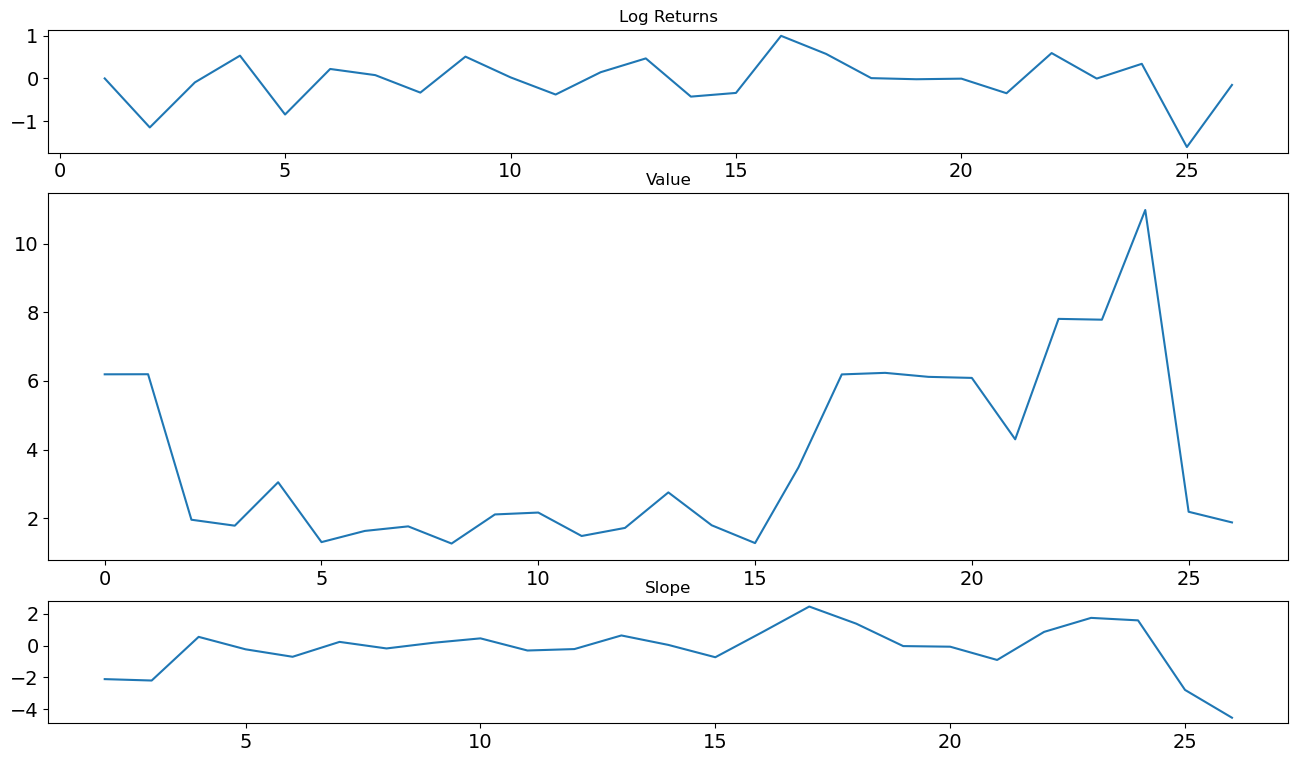

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(16, 9), gridspec_kw={'height_ratios': [1, 3, 1]})
df.log_returns.plot(ax=axes[0], fontsize= 14, title= 'Log Returns')
df.value.plot(ax=axes[1], fontsize= 14, title= 'Value')
df.slope.plot(ax=axes[2], fontsize= 14, title= 'Slope')

axes[0].set_ylabel = 'log_returns'
axes[1].set_ylabel = 'value'
axes[2].set_ylabel = ''
plt.show()


In [18]:
df

,date,value,date_ordinal,slope,log_returns
0,2018-10-29,6.192500,736996,NaN,NaN
1,2018-10-29,6.195000,736996,NaN,0.000404
2,2018-10-29,1.958333,736996,-2.117083,-1.151649
3,2018-10-29,1.785000,736996,-2.205000,-0.092675
4,2018-10-29,3.050000,736996,0.545833,0.535723
5,2018-10-29,1.306667,736996,-0.239167,-0.847662
6,2018-10-29,1.632500,736996,-0.708750,0.222633
7,2018-10-30,1.765000,736997,0.229167,0.078038
8,2018-10-30,1.265000,736997,-0.183750,-0.333079
9,2018-10-30,2.112500,736997,0.173750,0.512800
